In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('censusdata.csv')

# Logisitic Regression Workflow

# Dataset Exploration
# Exploratory Data Analysis
# Data Cleaning
# Feature Engineering
# Model Building
# Model Evaluation

# 1. Dataset Exploration

In [3]:
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [4]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [5]:
data.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object

In [6]:
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education.num     32561 non-null int64
marital.status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital.gain      32561 non-null int64
capital.loss      32561 non-null int64
hours.per.week    32561 non-null int64
native.country    32561 non-null object
income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [8]:
numerical = [feature for feature in data.columns if data[feature].dtype!='O']

numerical

['age',
 'fnlwgt',
 'education.num',
 'capital.gain',
 'capital.loss',
 'hours.per.week']

In [9]:
categorical = [feature for feature in data.columns if data[feature].dtype=='O']

categorical

['workclass',
 'education',
 'marital.status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native.country',
 'income']

In [10]:
data[numerical].describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [11]:
# Inferences 
# Age - Average: 38.5, Highest: 90, Lowest: 17
# education.num - Average: 10, Highest: 16, Lowest: 1
# capital.gain - Average: 1077.6, Highest: 99999, Lowest: 0
# capital.loss - Average: 87, Highest: 4356, Lowest: 0
# hours.per.week - Average: 40, Highest: 99, Lowest: 1

# Target Variable (y) - Income

# 2. Exploratory Data Analysis

In [12]:
# Analyzing the target variable (y) - income
data['income'].value_counts()

<=50K    24720
>50K      7841
Name: income, dtype: int64

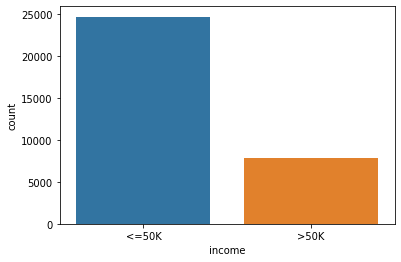

In [13]:
sns.countplot(data['income'])

In [14]:
# Inference: A considerably large amount people earn less than 50K 

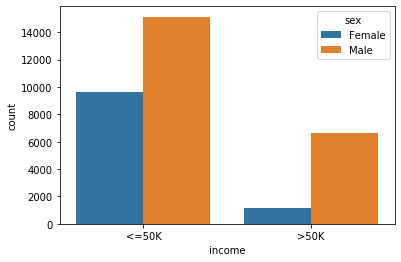

In [15]:
# income based off gender
sns.countplot(x='income', hue='sex', data=data)

In [16]:
#Inference: the difference between males and females earning more than 50K is larger than male and females earning less than 50K

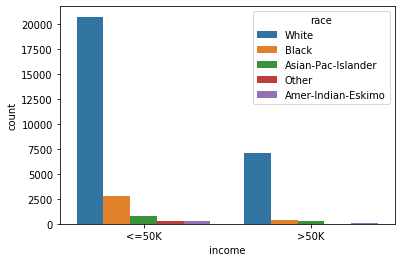

In [17]:
sns.countplot(x='income', hue='race', data=data)

In [18]:
# Inference: difference between white people and minorities in earning more than 50K is bigger than earning less than 50K

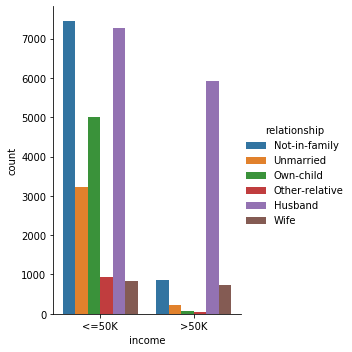

In [19]:
g = sns.catplot(x="income", hue="relationship", data=data, kind="count", height=5, aspect=.7)

In [20]:
# Inference: 

#Not-in-family: majority in less than 50K because they're usually young and don't have enough experience but very less in more
#               than 50K

# Husband: tend to be breadwinner so fairly consistent in both categories

# Own-child: Tends to decrease dramatically in more than 50K as it's hard for this kind of category to earn a lot

# Wife: fairly equal in both cateogories due to disparities in wage

# Analyzing the Numerical Variables

In [21]:
data[numerical].columns

Index(['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss',
       'hours.per.week'],
      dtype='object')

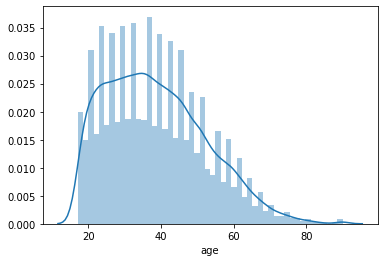

In [22]:
# analyzing age
sns.distplot(data['age'])

In [23]:
younger = len(data[(data['age']<=45)])

senior = len(data[(data['age']>45)])

print('senior - {} and younger - {}'.format(senior, younger))

senior - 9627 and younger - 22934


In [24]:
if senior>younger:
    print('Senior is more:')
    print(senior)
else:
    print('Younger is more:')
    print(younger)

Younger is more:
22934


In [25]:
# analyzing education.num
data['education.num'].value_counts()

9     10501
10     7291
13     5355
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: education.num, dtype: int64

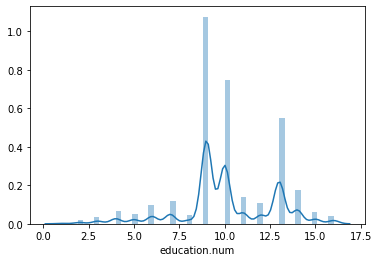

In [26]:
sns.distplot(data['education.num'])

In [27]:
# 7-10 is the most common education group. we need to compare that to education.num

In [28]:
len(data['education'].value_counts()), len(data['education.num'].value_counts())

(16, 16)

In [29]:
data['education'].value_counts(), data['education.num'].value_counts()

(HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
 Name: education, dtype: int64, 9     10501
 10     7291
 13     5355
 14     1723
 11     1382
 7      1175
 12     1067
 6       933
 4       646
 15      576
 5       514
 8       433
 16      413
 3       333
 2       168
 1        51
 Name: education.num, dtype: int64)

In [30]:
# 11th - 1175, 8, 12th - 433, 10 - college are the most common counts

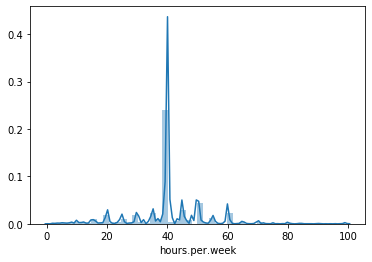

In [31]:
# analyzing hours per week

sns.distplot(data['hours.per.week'])

# Analyzing the Categorical Variables

In [32]:
data[categorical].columns

Index(['workclass', 'education', 'marital.status', 'occupation',
       'relationship', 'race', 'sex', 'native.country', 'income'],
      dtype='object')

In [33]:
# analyzing the workclass
data['workclass'].value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [34]:
workclass = data.groupby('workclass')
state_gov =workclass.get_group('State-gov')
local_gov = workclass.get_group('Local-gov')
federal_gov = workclass.get_group('Federal-gov')

In [35]:
govt_jobs = pd.concat([state_gov, local_gov, federal_gov], ignore_index=True)

In [36]:
govt_jobs['workclass'].value_counts()

Local-gov      2093
State-gov      1298
Federal-gov     960
Name: workclass, dtype: int64

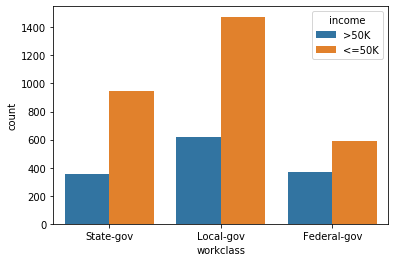

In [37]:
sns.countplot(x='workclass', hue='income', data=govt_jobs)

In [38]:
# the difference in  earnings is the highest in the local-gov, lowest in federal-gov

In [39]:
# difference in self-employed and not self-employed
workclass = data.groupby('workclass')
not_self_emp =workclass.get_group('Self-emp-not-inc')
self_emp = workclass.get_group('Self-emp-inc')

In [40]:
employed = pd.concat([not_self_emp, self_emp], ignore_index=True)

In [41]:
employed['workclass'].value_counts()

Self-emp-not-inc    2541
Self-emp-inc        1116
Name: workclass, dtype: int64

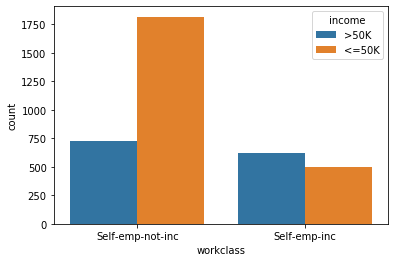

In [42]:
sns.countplot(x='workclass', hue='income', data=employed)

In [43]:
# self employed tend to earn similar amounts because they can regulate their earnings

In [44]:
# analyzing education
data['education'].value_counts()

HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64

In [45]:
education = data.groupby('education')
hs_grad =education.get_group('HS-grad')
eleven = education.get_group('11th')
ten = education.get_group('10th')
seveneight = education.get_group('7th-8th')
nine = education.get_group('9th')
twelve = education.get_group('12th')
fivesix = education.get_group('5th-6th')
onefour = education.get_group('1st-4th')
preschool = education.get_group('Preschool')

In [46]:
school = pd.concat([hs_grad, eleven, ten, seveneight, nine, twelve, fivesix, onefour, preschool], ignore_index=True)

In [47]:
school['education'].value_counts()

HS-grad      10501
11th          1175
10th           933
7th-8th        646
9th            514
12th           433
5th-6th        333
1st-4th        168
Preschool       51
Name: education, dtype: int64

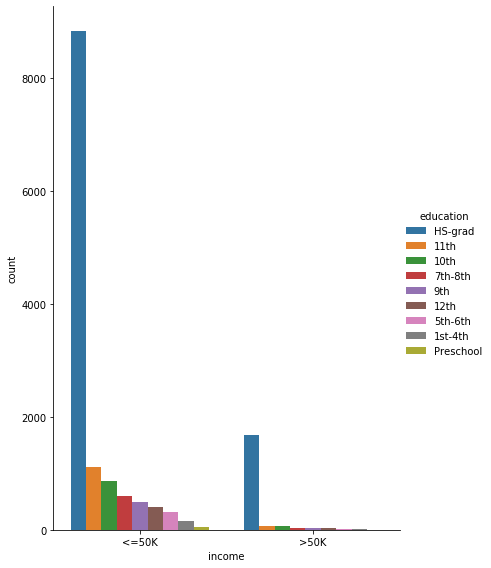

In [48]:
g = sns.catplot(x="income", hue="education", data=school, kind="count", height=8, aspect=.7)

In [49]:
education = data.groupby('education')
college =education.get_group('Some-college')
bachelors = education.get_group('Bachelors')
masters = education.get_group('Masters')
voc = education.get_group('Assoc-voc')
acdm = education.get_group('Assoc-acdm')
prof = education.get_group('Prof-school')
doctorate = education.get_group('Doctorate')

In [50]:
uni = pd.concat([college, bachelors, masters, voc, acdm, prof, doctorate], ignore_index=True)

In [51]:
uni['education'].value_counts()

Some-college    7291
Bachelors       5355
Masters         1723
Assoc-voc       1382
Assoc-acdm      1067
Prof-school      576
Doctorate        413
Name: education, dtype: int64

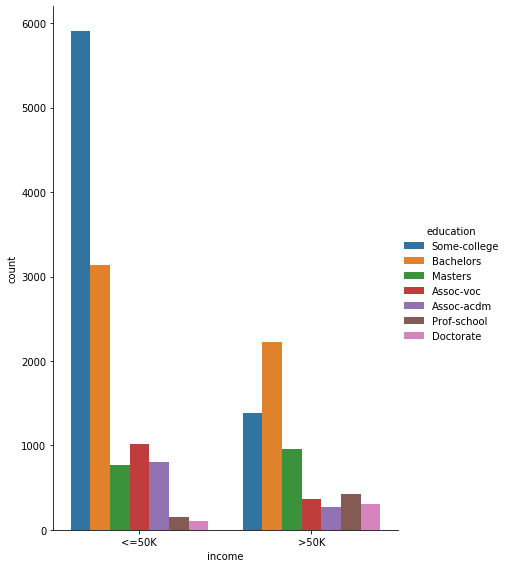

In [52]:
g = sns.catplot(x="income", hue="education", data=uni, kind="count", height=8, aspect=.7)

In [53]:
# in less than 50K, average college degrees earned more, but in more than 50K defined bachelors degrees earned the most

In [54]:
# analyzing occupation

data['occupation'].value_counts()

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

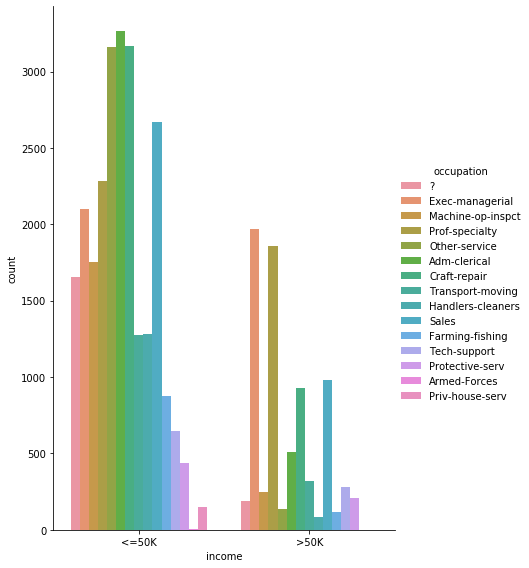

In [55]:
g = sns.catplot(x="income", hue="occupation", data=data, kind="count", height=8, aspect=.7)

In [56]:
# analyzing race 

data['race'].value_counts()

White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: race, dtype: int64

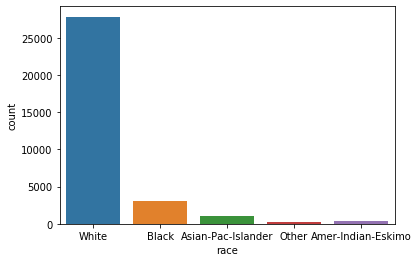

In [57]:
sns.countplot(data['race'])

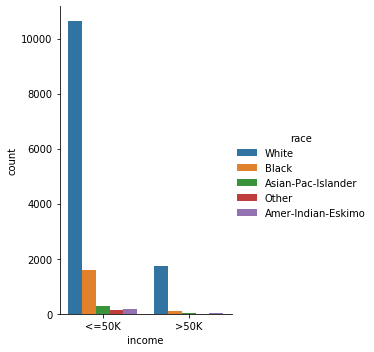

In [58]:
g = sns.catplot(x="income", hue="race", data=school, kind="count", height=5, aspect=.7)

In [59]:
# difference between in earning between white and minority groups is greater in more than 50K than less than 50K

In [60]:
# analyzing the minority groups

race = data.groupby('race')
black = race.get_group('Black')
asian = race.get_group('Asian-Pac-Islander')
other = race.get_group('Other')
eskimo = race.get_group('Amer-Indian-Eskimo')

In [61]:
minority = pd.concat([black, asian, other, eskimo], ignore_index=True)

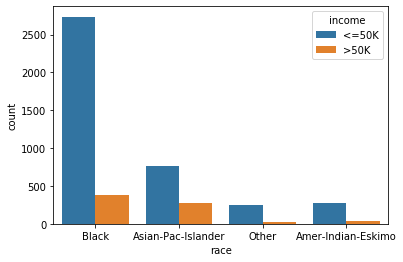

In [62]:
sns.countplot(x='race', hue='income', data=minority)

In [63]:
# analyzing sex

data['sex'].value_counts()

Male      21790
Female    10771
Name: sex, dtype: int64

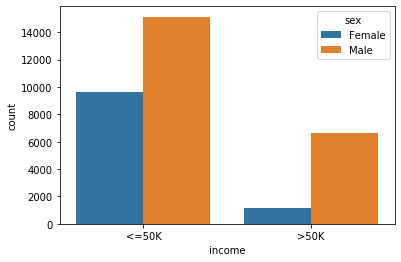

In [64]:
sns.countplot(x='income', hue='sex', data=data)

In [65]:
# difference in earning between male and females increaeses in the more than 50K category

# 3. Data Cleaning

# Finding Outliers

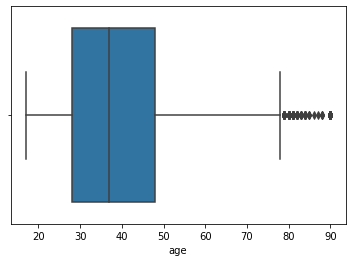

In [66]:
# finding outliers for age
sns.boxplot(data['age'])

In [67]:
data['age'].unique()

array([90, 82, 66, 54, 41, 34, 38, 74, 68, 45, 52, 32, 51, 46, 57, 22, 37,
       29, 61, 21, 33, 49, 23, 59, 60, 63, 53, 44, 43, 71, 48, 73, 67, 40,
       50, 42, 39, 55, 47, 31, 58, 62, 36, 72, 78, 83, 26, 70, 27, 35, 81,
       65, 25, 28, 56, 69, 20, 30, 24, 64, 75, 19, 77, 80, 18, 17, 76, 79,
       88, 84, 85, 86, 87], dtype=int64)

In [68]:
len(data[data['age']>=80]), data['age'].count()

(121, 32561)

In [69]:
data = data[data.age <= 70]

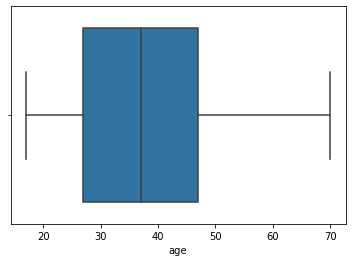

In [70]:
sns.boxplot(data['age'])

In [71]:
len(data['age'])

32021

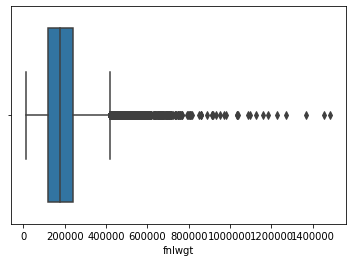

In [72]:
# finding outliers for fnlwgt

sns.boxplot(data['fnlwgt'])

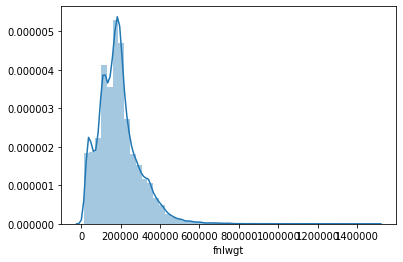

In [73]:
sns.distplot(data['fnlwgt'])

In [74]:
# using quantile method

iqr = data['fnlwgt'].quantile(0.75) - data['fnlwgt'].quantile(0.25)
lower_bound = data['fnlwgt'].quantile(0.25) - (iqr * 3)
upper_bound = data['fnlwgt'].quantile(0.75) + (iqr * 3)
print('fnlwgt outliers are values < {lower} or > {upper}'.format(lower=lower_bound, upper=upper_bound))

fnlwgt outliers are values < -241255.0 or > 596967.0


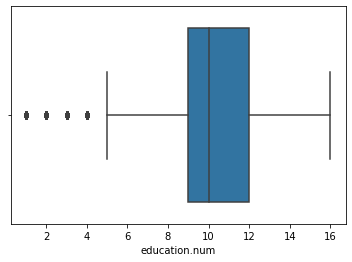

In [75]:
# finding outliers for education.num

sns.boxplot(data['education.num'])

In [76]:
# using quantile method

iqr = data['education.num'].quantile(0.75) - data['education.num'].quantile(0.25)
lower_bound = data['education.num'].quantile(0.25) - (iqr * 3)
upper_bound = data['education.num'].quantile(0.75) + (iqr * 3)
print('education.num outliers are values < {lower} or > {upper}'.format(lower=lower_bound, upper=upper_bound))

education.num outliers are values < 0.0 or > 21.0


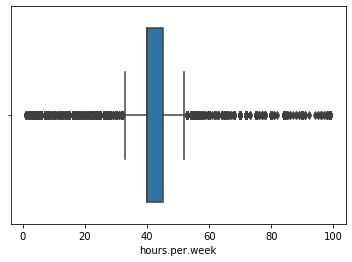

In [77]:
# finding outliers for hours.per.week

sns.boxplot(data['hours.per.week'])

In [78]:
len(data[data['hours.per.week']!=40]), len(data[data['hours.per.week']==40]), data['hours.per.week'].count()

(16916, 15105, 32021)

In [79]:
iqr = data['hours.per.week'].quantile(0.75) - data['hours.per.week'].quantile(0.25)
lower_bound = data['hours.per.week'].quantile(0.25) - (iqr * 3)
upper_bound = data['hours.per.week'].quantile(0.75) + (iqr * 3)
print('hours.per.week outliers are values < {lower} or > {upper}'.format(lower=lower_bound, upper=upper_bound))

hours.per.week outliers are values < 25.0 or > 60.0


# Cleaning Categorical Variables

In [80]:
# cleaning workclass feature

len(data['workclass'].value_counts())

9

In [81]:
data.workclass.unique()

array(['?', 'Private', 'Federal-gov', 'Self-emp-not-inc', 'Self-emp-inc',
       'State-gov', 'Local-gov', 'Without-pay', 'Never-worked'],
      dtype=object)

In [82]:
data.education.unique()

array(['Some-college', '7th-8th', 'HS-grad', '10th', 'Doctorate',
       'Prof-school', 'Bachelors', 'Masters', '11th', 'Assoc-acdm',
       'Assoc-voc', '1st-4th', '5th-6th', '12th', '9th', 'Preschool'],
      dtype=object)

In [83]:
data['marital.status'].unique()

array(['Widowed', 'Divorced', 'Separated', 'Never-married',
       'Married-civ-spouse', 'Married-spouse-absent', 'Married-AF-spouse'],
      dtype=object)

In [84]:
data['relationship'].unique()

array(['Unmarried', 'Own-child', 'Not-in-family', 'Husband', 'Wife',
       'Other-relative'], dtype=object)

In [85]:
data['occupation'].unique()

array(['?', 'Machine-op-inspct', 'Prof-specialty', 'Other-service',
       'Adm-clerical', 'Craft-repair', 'Exec-managerial',
       'Transport-moving', 'Handlers-cleaners', 'Sales', 'Tech-support',
       'Protective-serv', 'Farming-fishing', 'Armed-Forces',
       'Priv-house-serv'], dtype=object)

In [86]:
data.race.unique()

array(['Black', 'White', 'Asian-Pac-Islander', 'Other',
       'Amer-Indian-Eskimo'], dtype=object)

In [87]:
data['native.country'].unique()

array(['United-States', '?', 'Mexico', 'Greece', 'China', 'Taiwan',
       'India', 'Philippines', 'Trinadad&Tobago', 'Canada', 'South',
       'Holand-Netherlands', 'Puerto-Rico', 'Poland', 'Iran', 'England',
       'Germany', 'Italy', 'Japan', 'Hong', 'Honduras', 'Cuba', 'Ireland',
       'Cambodia', 'Peru', 'Nicaragua', 'Dominican-Republic', 'Vietnam',
       'Haiti', 'El-Salvador', 'Columbia', 'Guatemala', 'Jamaica',
       'France', 'Yugoslavia', 'Hungary', 'Scotland', 'Portugal',
       'Ecuador', 'Laos', 'Thailand', 'Outlying-US(Guam-USVI-etc)'],
      dtype=object)

In [88]:
data['sex'].unique()

array(['Female', 'Male'], dtype=object)

In [89]:
data[categorical].count()

workclass         32021
education         32021
marital.status    32021
occupation        32021
relationship      32021
race              32021
sex               32021
native.country    32021
income            32021
dtype: int64

# 4. Feature Engineering

# Checking Correlation between features

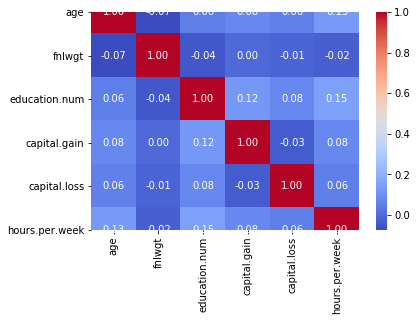

In [90]:
sns.heatmap(data[numerical].corr(),annot=True, fmt = ".2f", cmap = "coolwarm")

In [91]:
# not much correlation between numerical features

# Converting Categorical Variables to Dummy Variables

In [92]:
data[categorical].dtypes

workclass         object
education         object
marital.status    object
occupation        object
relationship      object
race              object
sex               object
native.country    object
income            object
dtype: object

In [93]:
test=data.copy()

In [94]:
xtest=data.drop(['income'], axis=1)
ytest=data['income']

In [95]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(xtest, ytest, test_size = 0.3, random_state = 0)

In [96]:
from sklearn import preprocessing

In [97]:
categorical = ['workclass', 'education', 'marital.status', 'occupation','relationship', 'race', 'sex', 'native.country']

In [98]:
for feature in categorical:
        le = preprocessing.LabelEncoder()
        x_train[feature] = le.fit_transform(x_train[feature])
        x_test[feature] = le.transform(x_test[feature])

In [99]:
x_train.dtypes

age               int64
workclass         int32
fnlwgt            int64
education         int32
education.num     int64
marital.status    int32
occupation        int32
relationship      int32
race              int32
sex               int32
capital.gain      int64
capital.loss      int64
hours.per.week    int64
native.country    int32
dtype: object

In [100]:
from sklearn.linear_model import LogisticRegression

In [101]:
logreg=LogisticRegression()

In [102]:
logreg.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [103]:
y_pred=logreg.predict(x_test)

In [104]:
from sklearn.metrics import accuracy_score

In [105]:
('Logistic Regression accuracy score with all the features: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

'Logistic Regression accuracy score with all the features: 0.7994'